
# MSM of Brownian dynamics simulations of diffusion on a 2D surface

In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import time
import itertools
import h5py
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here we upload the data obtained from Brownian Dynamics simulations of diffusion on a 2D free energy profile, in which:
$$
\begin{equation*}
\frac{D_x}{D_q}=1\end{equation*}$$ where $D_x$ is the diffusion coefficient of the molecule, while $D_q$ describes the diffusion along the measured extension.

In [2]:
h5file = "data/cossio_kl1.3_Dx1_Dq1.h5"
f = h5py.File(h5file, 'r')
data = np.array(f['data'])
f.close()

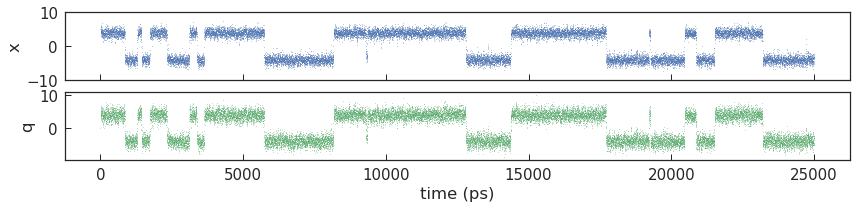

In [3]:
fig, ax = plt.subplots(2,1,figsize=(12,3), sharex=True,sharey=False)
ax[0].plot(data[:,0],data[:,1],'.', markersize=1)
ax[1].plot(data[:,0],data[:,2],'g.', markersize=1)
ax[0].set_ylim(-10,10)
ax[0].set_ylabel('x')
ax[1].set_ylabel('q')
ax[1].set_xlabel('time (ps)')
plt.tight_layout(h_pad=0)

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


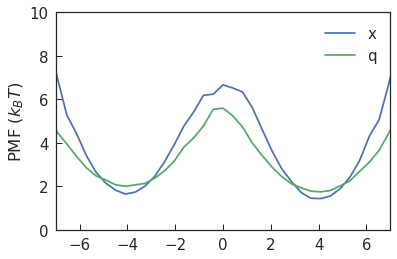

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
hist, bin_edges = np.histogram(data[:,1], bins=np.linspace(-10,10,50), normed=True)
bin_centers = [0.5*(bin_edges[i]+bin_edges[i+1]) \
               for i in range(len(bin_edges)-1)]
ax.plot(bin_centers, -np.log(hist),label="x")
hist, bin_edges = np.histogram(data[:,2], bins=np.linspace(-10,10,50), normed=True)
bin_centers = [0.5*(bin_edges[i]+bin_edges[i+1]) \
               for i in range(len(bin_edges)-1)]
ax.plot(bin_centers, -np.log(hist),label="q")
ax.set_xlim(-7,7)
ax.set_ylim(0,10)
#ax.set_xlabel('x')
ax.set_ylabel('PMF ($k_BT$)')
ax.legend()


/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


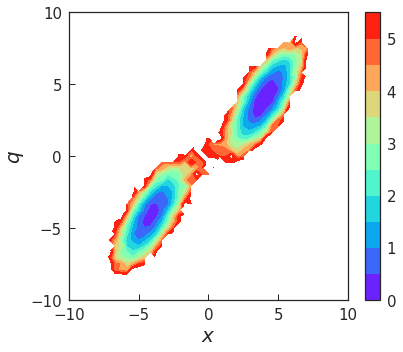

In [22]:
H, x_edges, y_edges = np.histogram2d(data[:,1],data[:,2], \
            bins=[np.linspace(-10,10,50), np.linspace(-10,10,50)])

fig, ax = plt.subplots(figsize=(6,5))
pmf = -np.log(H.transpose())
pmf -= np.min(pmf)
cs = ax.contourf(pmf, extent=[x_edges.min(), x_edges.max(), \
                     y_edges.min(), y_edges.max()], \
                   cmap=cm.rainbow, levels=np.arange(0, 6,0.5))

cbar = plt.colorbar(cs)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_yticks(range(-10,11,5))
ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$q$', fontsize=20)
plt.tight_layout()

Now we discretize the trajectory using the states obtained from partitioning the 2D free energy surface of the diffusion of the molecule. We first need to import the function that makes the grid.


In [28]:
from scipy.stats import binned_statistic_2d

In [7]:
statistic, x_edge, y_edge, binnumber = binned_statistic_2d(data[:,1],data[:,2],
                                                           None,'count',bins=[np.linspace(-10,10,20),\
                                                                              np.linspace(-10,10,20)])

/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


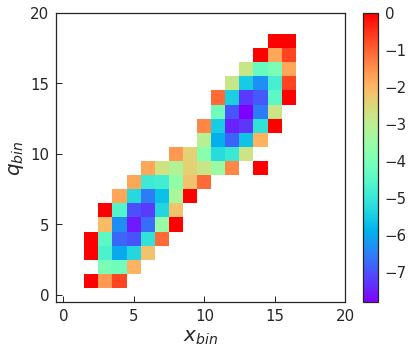

In [8]:
fig, ax = plt.subplots(figsize=(6,5))

grid = ax.imshow(-np.log(statistic.transpose()),origin="lower",cmap=plt.cm.rainbow)

cbar = plt.colorbar(grid)
ax.set_yticks(range(0,21,5))
ax.set_xticks(range(0,21,5))
ax.set_xlabel('$x_{bin}$', fontsize=20)
ax.set_ylabel('$q_{bin}$', fontsize=20)
plt.tight_layout()

(0, 500)

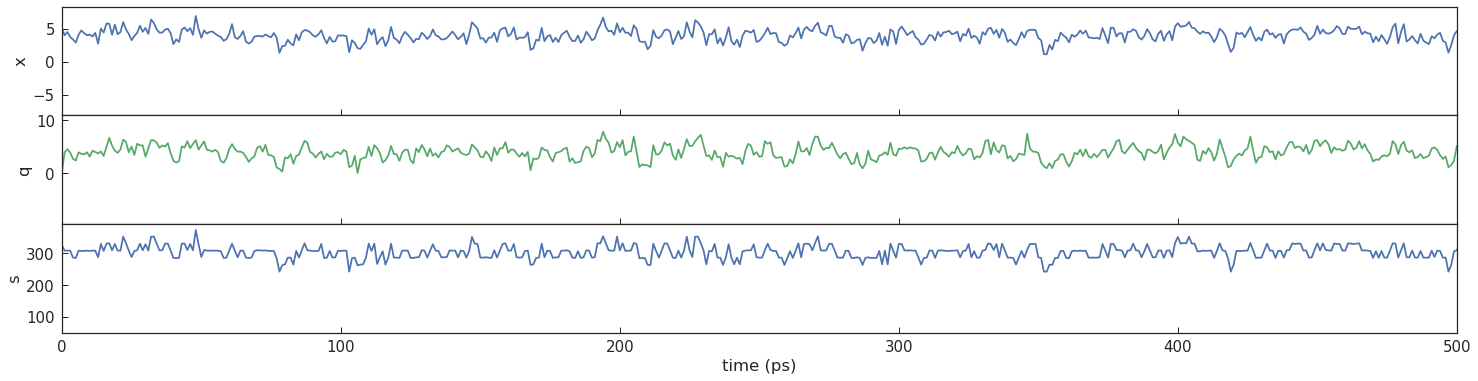

In [9]:
fig,ax=plt.subplots(3,1,figsize=(25,6),sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].plot(range(0,len(data[:,1])),data[:,1])
ax[1].plot(range(0,len(data[:,2])),data[:,2],color="g")
ax[2].plot(binnumber)
ax[0].set_ylabel('x')
ax[1].set_ylabel('q')
ax[2].set_ylabel("s")
ax[2].set_xlabel("time (ps)")
ax[2].set_xlim(0,500)

### Master Equation Model 

In [10]:
from mastermsm.trajectory import traj
from mastermsm.msm import msm

In [11]:
distraj=traj.TimeSeries(distraj=list(binnumber),dt=1)
distraj.find_keys()
distraj.keys.sort()

In [12]:
msm_2D=msm.SuperMSM([distraj])


 Building MSM from 
     # states: 91


#### Convergence Test

In [13]:
for i in [1, 2, 5, 10, 20, 50, 100]:
    msm_2D.do_msm(i, sym=False)
    msm_2D.msms[i].do_trans(evecs=True)
    msm_2D.msms[i].boots(plot=False)

/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm.py:715: RuntimeWarning: invalid value encountered in log
  tauT.append(-self.lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm.py:731: ComplexWarning: Casting complex values to real discards the imaginary part
  rvecsT_sorted[:,i] = rvecsT[:,iiT]
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm.py:732: ComplexWarning: Casting complex values to real discards the imaginary part
  lvecsT_sorted[:,i] = lvecsT[:,iiT]
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encoun

/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/home/aaguirre/anaconda2/lib/python2.7/site-packages/mastermsm/msm/msm_lib.py:526: RuntimeWarning: invalid value encountered in log
  tauT.append(-lagt/np.log(lamT))
/hom

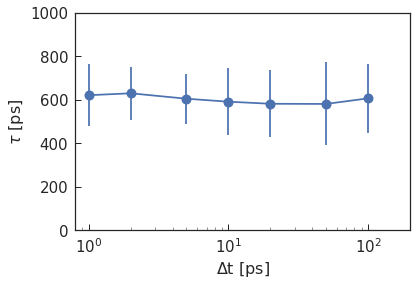

In [14]:
tau_vs_lagt = np.array([[x,msm_2D.msms[x].tauT[0],msm_2D.msms[x].tau_std[0]] \
               for x in sorted(msm_2D.msms.keys())])
fig, ax = plt.subplots()
ax.errorbar(tau_vs_lagt[:,0],tau_vs_lagt[:,1],fmt='o-', yerr=tau_vs_lagt[:,2], markersize=10)
#ax.fill_between(10**np.arange(-0.2,3,0.2), 1e-1, 10**np.arange(-0.2,3,0.2), facecolor='lightgray')
ax.set_xlabel(r'$\Delta$t [ps]', fontsize=16)
ax.set_ylabel(r'$\tau$ [ps]', fontsize=16)
ax.set_xlim(0.8,200)
ax.set_ylim(0,1000)
_ = ax.set_xscale('log')

There is no dependency of the relaxation times $\tau$ on the lag time $\Delta$t.


/home/aaguirre/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


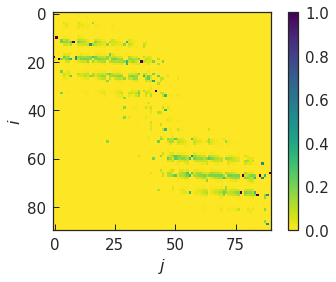

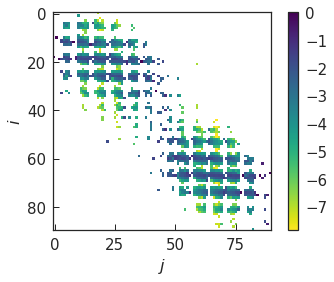

In [15]:
lt=2
plt.figure()
plt.imshow(msm_2D.msms[lt].trans, interpolation='none', \
    cmap='viridis_r')
plt.ylabel('$\it{i}$')
plt.xlabel('$\it{j}$')
plt.colorbar()
plt.figure()
plt.imshow(np.log(msm_2D.msms[lt].trans), interpolation='none', \
    cmap='viridis_r')
plt.ylabel('$\it{i}$')
plt.xlabel('$\it{j}$')
plt.colorbar()

Text(0,0.5,'$\\tau_i$ [ns]')

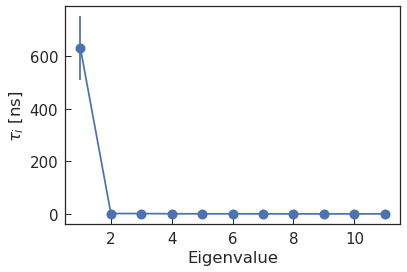

In [29]:
fig, ax = plt.subplots()
ax.errorbar(range(1,12),msm_2D.msms[lt].tauT[0:11], fmt='o-', \
            yerr= msm_2D.msms[lt].tau_std[0:11], ms=10)
ax.set_xlabel('Eigenvalue')
ax.set_ylabel(r'$\tau_i$ [ns]') 

The first mode captured by $\lambda_1$ is significantly slower than the others. That mode, which is described by the right eigenvector $\psi^R_1$ as the transition of the protein between the folded and unfolded states.

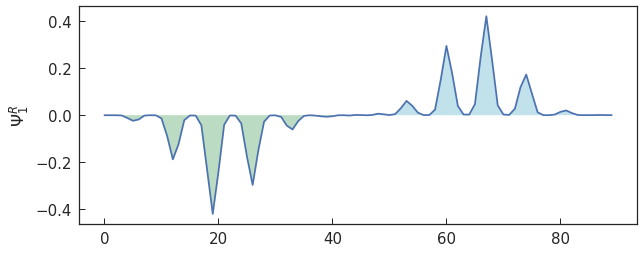

In [17]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(msm_2D.msms[2].rvecsT[:,1])
ax.fill_between(range(len(msm_2D.msms[lt].rvecsT[:,1])), 0, \
                msm_2D.msms[lt].rvecsT[:,1], \
                where=msm_2D.msms[lt].rvecsT[:,1]>0,\
                facecolor='c', interpolate=True,alpha=.4)
ax.fill_between(range(len(msm_2D.msms[lt].rvecsT[:,1])), 0, \
                msm_2D.msms[lt].rvecsT[:,1], \
                where=msm_2D.msms[lt].rvecsT[:,1]<0,\
                facecolor='g', interpolate=True,alpha=.4)
ax.set_ylabel("$\Psi^R_1$")
plt.show()